<a href="https://colab.research.google.com/github/au2021116025/NANDHINI-B/blob/main/Copy_of_IRIS_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas
from google.colab import drive
drive.mount('/content/gdrive')
csvfile = 'gdrive/My Drive/iris.csv'
df=pandas.read_csv(csvfile)
df = df.dropna()
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,Iris-setosa
1,2.0,4.9,3.0,1.4,0.2,Iris-setosa
2,3.0,4.7,3.2,1.3,0.2,Iris-setosa
3,4.0,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,5.0,3.6,1.4,0.2,Iris-setosa


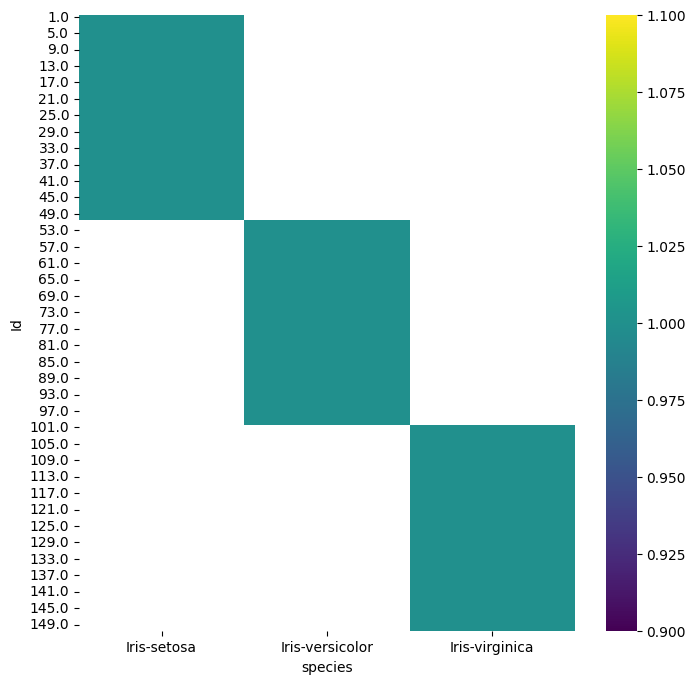

In [ ]:
#species vs id

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Id'].value_counts()
    for x_label, grp in df.groupby('Species')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('species')
_ = plt.ylabel('Id')

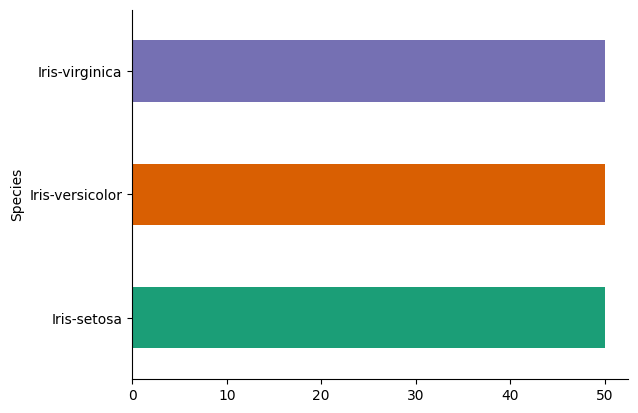

In [ ]:
# @title species

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

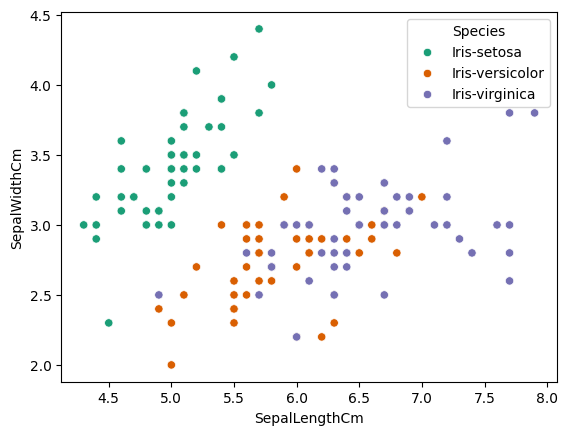

In [ ]:

sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species',palette='Dark2')

<ipython-input-14-da62dd46d130>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='SepalLengthCm',y='SepalWidthCm',data=df,kind='box',col='Species',palette='Dark2')


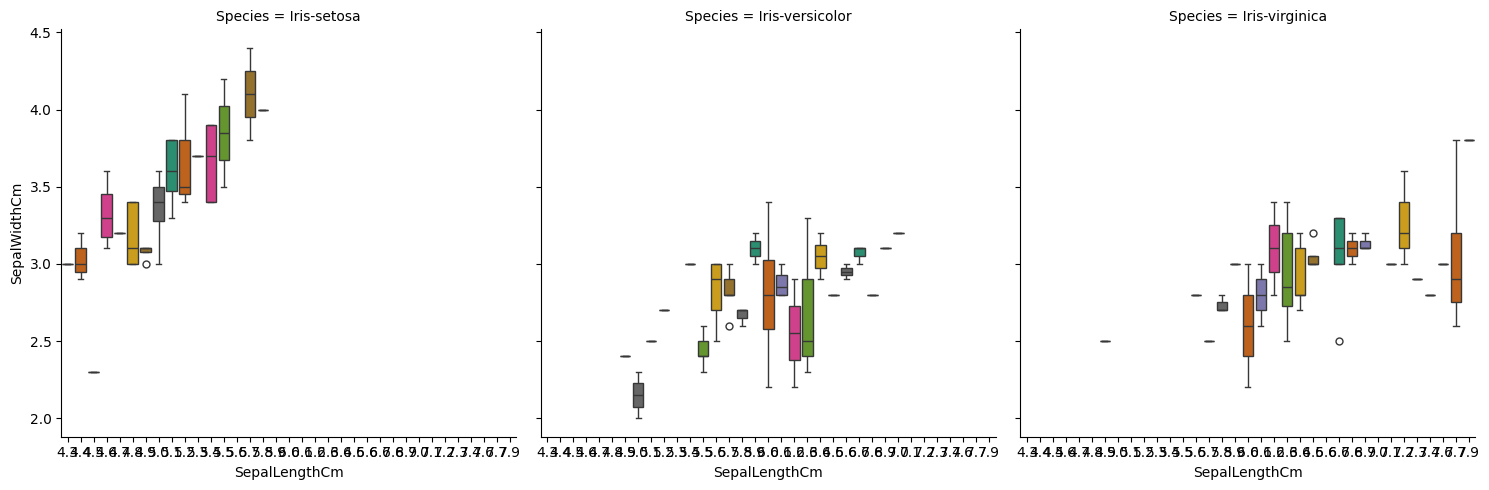

In [ ]:
sns.catplot(x='SepalLengthCm',y='SepalWidthCm',data=df,kind='box',col='Species',palette='Dark2')

In [ ]:
pd.get_dummies(df)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1.0,5.1,3.5,1.4,0.2,1,0,0
1,2.0,4.9,3.0,1.4,0.2,1,0,0
2,3.0,4.7,3.2,1.3,0.2,1,0,0
3,4.0,4.6,3.1,1.5,0.2,1,0,0
4,5.0,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
147,146.0,6.7,3.0,5.2,2.3,0,0,1
148,147.0,6.3,2.5,5.0,1.9,0,0,1
149,148.0,6.5,3.0,5.2,2.0,0,0,1
150,149.0,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
X = pd.get_dummies(df.drop('Species',axis=1),drop_first=True)
y = df['Species']

In [ ]:
X.shape

(150, 5)

In [ ]:
y.shape

(150,)

In [ ]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1.0,5.1,3.5,1.4,0.2
1,2.0,4.9,3.0,1.4,0.2
2,3.0,4.7,3.2,1.3,0.2
3,4.0,4.6,3.1,1.5,0.2
4,5.0,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [ ]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

DECISION TREE WITH ENTROPY

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')


In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

VISUALIZE THE TREE

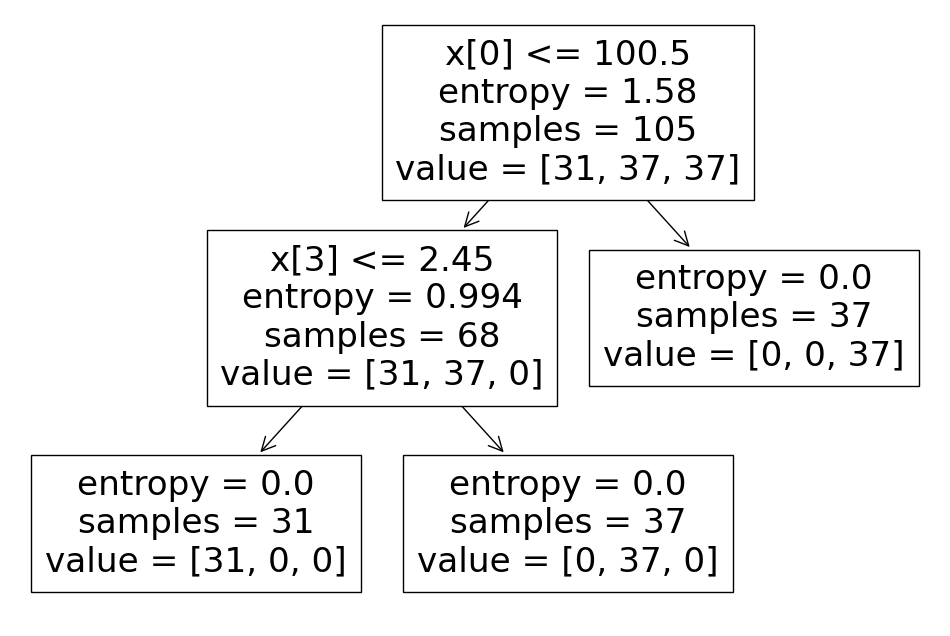

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(model);

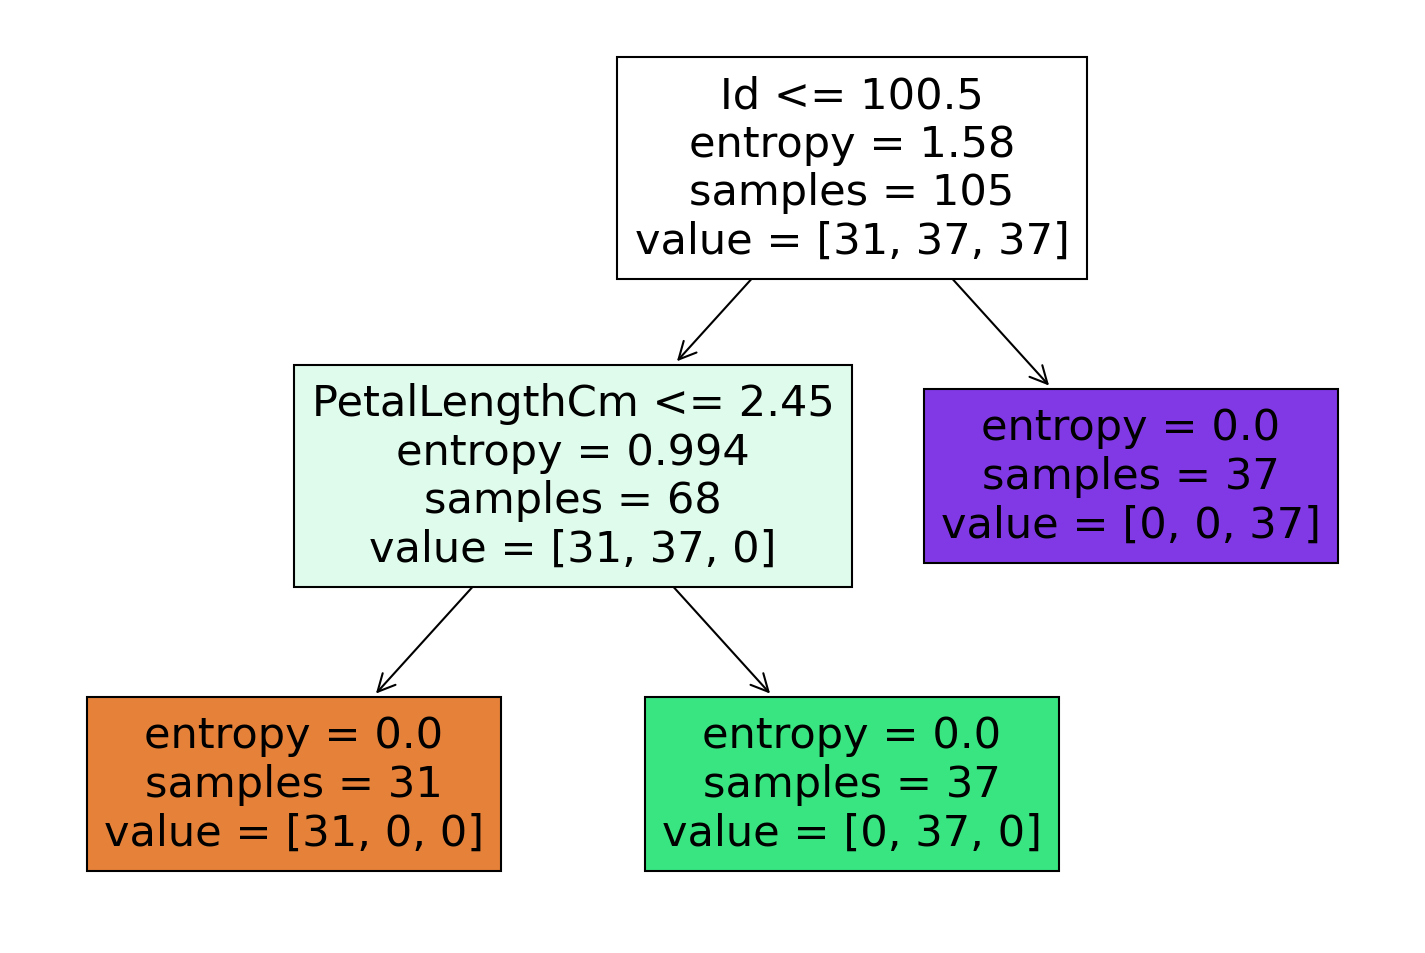

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

PREDICTION OF TEST

In [ ]:
base_pred = model.predict(X_test)

EVALUATION

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test,base_pred)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

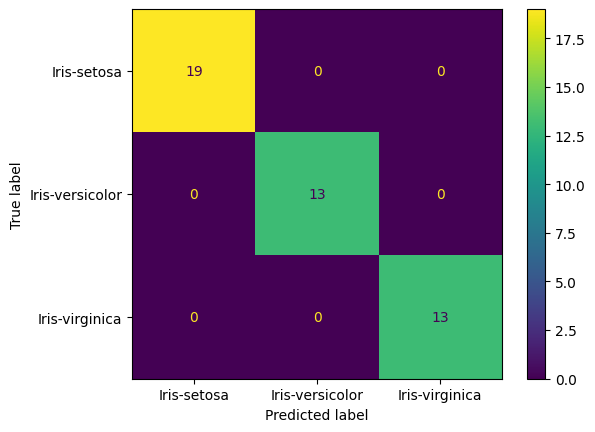

In [ ]:
disp.plot()

In [ ]:
print(classification_report(y_test,base_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [ ]:
model.feature_importances_

array([0.59245911, 0.        , 0.        , 0.40754089, 0.        ])

In [ ]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Id,0.592459
SepalLengthCm,0.000000
SepalWidthCm,0.000000
PetalLengthCm,0.407541
PetalWidthCm,0.000000


<Axes: xlabel='Species', ylabel='PetalWidthCm'>

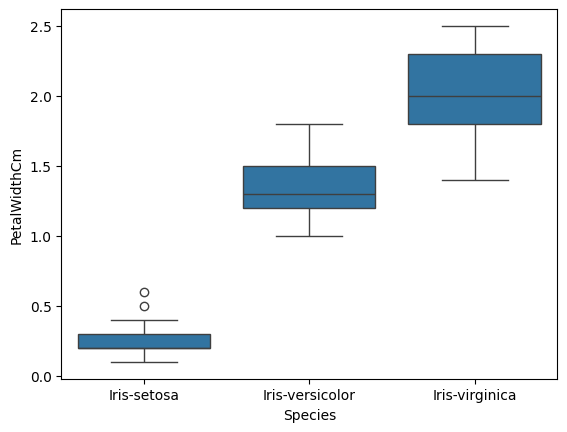

In [ ]:
sns.boxplot(x='Species',y='PetalWidthCm',data=df)

In [ ]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

WORK WITH HYPERPARAMETERS

In [ ]:
pruned_tree = DecisionTreeClassifier(criterion='entropy',max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45





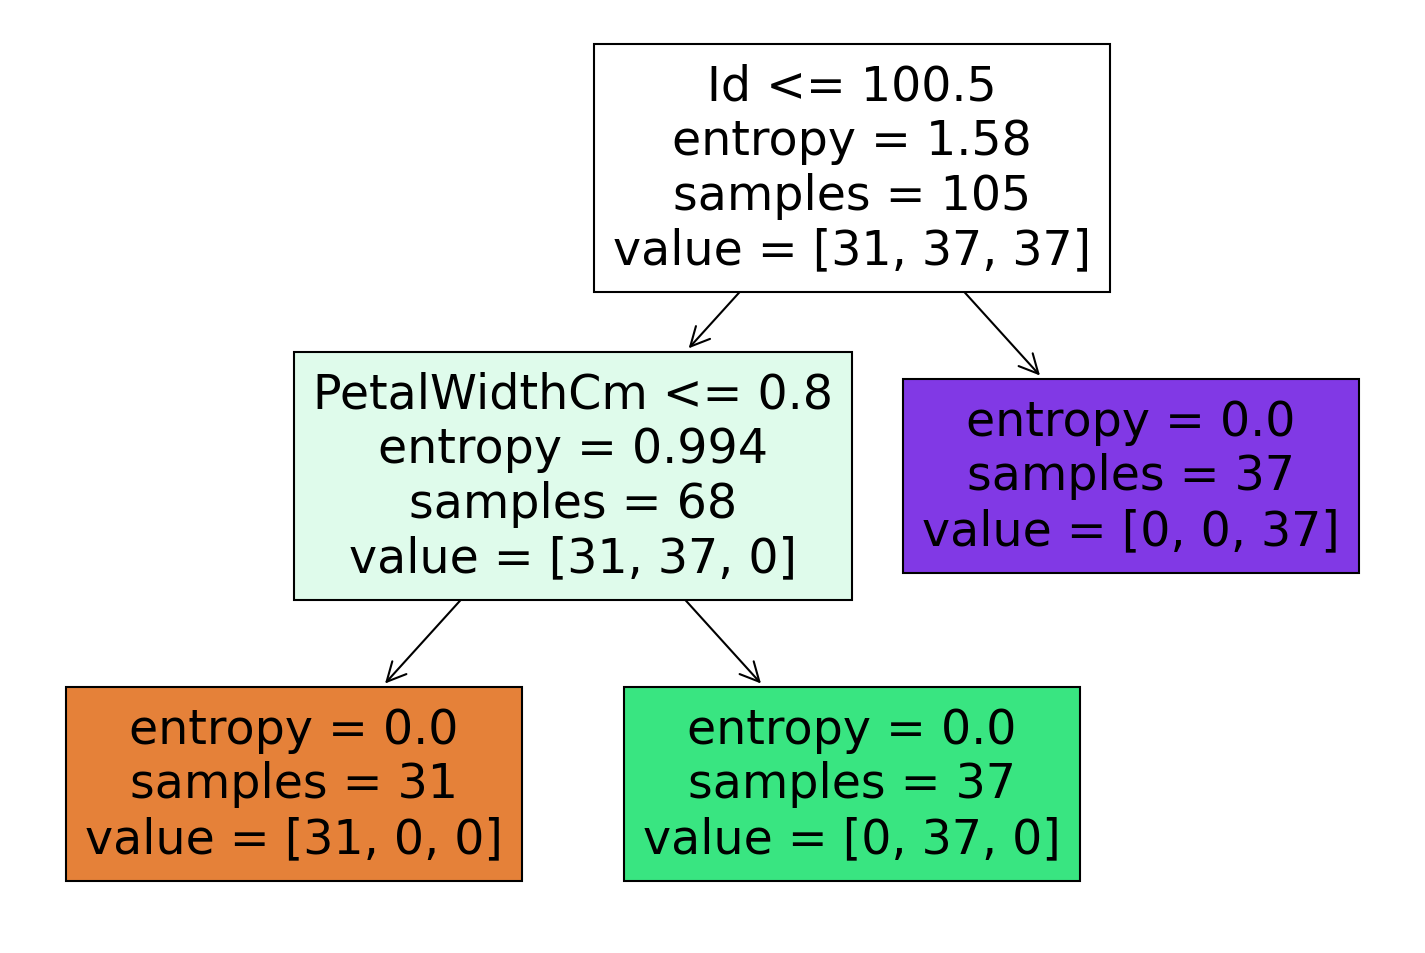

In [ ]:
report_model(pruned_tree)

PREDICTION WITH UNSEEN DATA

In [ ]:
import pickle

# Assuming you already have your trained model 'pruned_tree'
penguin_model = 'decision_tree_model.pkl'  # Choose a filename
pickle.dump(pruned_tree, open(penguin_model, 'wb'))

In [ ]:
import pickle

loaded_model = pickle.load(open('decision_tree_model.pkl', 'rb'))

In [ ]:
row_100 = X.iloc[100]
row_100

Id               101.0
SepalLengthCm      6.3
SepalWidthCm       3.3
PetalLengthCm      6.0
PetalWidthCm       2.5
Name: 102, dtype: float64

In [ ]:
new_data =[[42,17,180,3350,1]]
prediction = loaded_model.predict(new_data)
print(prediction)

['Iris-versicolor']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
